<a href="https://colab.research.google.com/github/jcmacuacua/Dados_Hyperspetral/blob/main/Texto_usando_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np

# Exemplo de corpus de documentos
corpus = [
    "O rato roeu a roupa do rei de Roma",
    "Quem com ferro fere, com ferro será ferido",
    "Água mole em pedra dura tanto bate até que fura"
]

# Vetoriza os documentos usando TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

# Aplica PCA para reduzir a dimensionalidade
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X.toarray())

# Mostra a representação reduzida de cada documento
for i, doc in enumerate(corpus):
    print(f"Documento {i+1}: {X_reduced[i]}")

Documento 1: [3.07774707e-16 8.16496581e-01]
Documento 2: [ 0.70710678 -0.40824829]
Documento 3: [-0.70710678 -0.40824829]


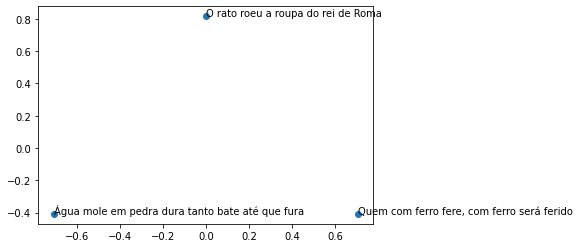

In [7]:
import matplotlib.pyplot as plt

# Plota os documentos no espaço reduzido de duas dimensões
plt.scatter(X_reduced[:, 0], X_reduced[:, 1])

# Adiciona rótulos aos pontos de dados correspondentes aos documentos
for i, txt in enumerate(corpus):
    plt.annotate(txt, (X_reduced[i, 0], X_reduced[i, 1]))

# Mostra o gráfico
plt.show()

In [ ]:
!pip install transformers
!pip install sklearn

In [3]:
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import torch
from transformers import AutoTokenizer, AutoModel
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Escreva o texto de entrada
texto = "O gato preto cruzou a rua"

# Carregue o modelo BERT e o tokenizer correspondente
modelo = AutoModel.from_pretrained("neuralmind/bert-base-portuguese-cased")
tokenizer = AutoTokenizer.from_pretrained("neuralmind/bert-base-portuguese-cased")

# Converta o texto em tokens e adicione tokens especiais (CLS e SEP)
tokens = tokenizer.encode(texto, add_special_tokens=True)

# Obtenha as representações vetoriais para cada token
#representacoes, _ = modelo(torch.Tensor([tokens])).last_hidden_state.split(1, dim=1)
#representacoes = representacoes.squeeze().detach().numpy()


#tokens_tensor = torch.tensor(tokens).unsqueeze(0)  # Converta para um tensor e adicione uma dimensão adicional
#representacoes, _ = modelo(tokens_tensor).last_hidden_state.split(1, dim=1)
#representacoes = representacoes.squeeze().detach().numpy()
#representacoes = modelo(torch.Tensor([tokens])).last_hidden_state.split(1, dim=1)[0]
#representacoes = representacoes.squeeze().detach().numpy()
saida = modelo(tokens_tensor)
representacoes = saida.last_hidden_state.squeeze(0).detach().numpy()

#tokens_tensor = torch.tensor(tokens).unsqueeze(0).long()  # Converte para um tensor Long e adiciona uma dimensão adicional
#representacoes, _ = modelo(tokens_tensor).last_hidden_state.split(1, dim=1)
#representacoes = representacoes.squeeze().detach().numpy()



# Use PCA para reduzir as dimensões dos vetores para 2
pca = PCA(n_components=2)
pca_resultados = pca.fit_transform(representacoes)

# Plote os resultados
plt.scatter(pca_resultados[:, 0], pca_resultados[:, 1])
for i, token in enumerate(tokenizer.convert_ids_to_tokens(tokens)):
    plt.annotate(token, xy=(pca_resultados[i, 0], pca_resultados[i, 1]))
plt.show()


In [22]:
import torch

# Example input tensor
input_tensor = torch.tensor([[1.0, 2.0], [3.0, 4.0]])

# Convert to torch.LongTensor
indices = input_tensor.long()

# Or convert to torch.IntTensor
# indices = input_tensor.int()

# Embedding layer
embedding_layer = torch.nn.Embedding(10, 3)

# Apply the embedding layer with the converted indices
output = embedding_layer(indices)

print(output)

tensor([[[ 1.8869,  0.1908,  1.7310],
         [ 0.7886,  1.7336, -0.8963]],

        [[-1.6534,  0.3216, -0.2975],
         [-0.3602,  0.5033,  2.0535]]], grad_fn=<EmbeddingBackward0>)


#Exemplo de código que utiliza o CountVectorizer para transformar um corpus de texto em uma matriz de recursos e, em seguida, realiza a análise de componentes principais (PCA) para reduzir a dimensionalidade dos recursos extraídos para apenas dois componentes, que são exibidos em um gráfico de dispersão.


In [14]:
!pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
import re
import numpy as np
from unidecode import unidecode
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
sentences = [
    "A educação é o processo de facilitar o aprendizado",
    "A educação é o processo de aquisição de conhecimentos, habilidades, valores, crenças e hábitos",
    "A educação é uma prática social que visa o desenvolvimento do ser humano, de suas potencialidades, habilidades e competências",
    "Bitcoin é uma criptomoeda descentralizada, sendo um dinheiro eletrônico para, transações ponto a ponto"
]

In [17]:
sw = nltk.corpus.stopwords.words('portuguese')

In [18]:
def text_clean(raw_text):
    # Remover acentos e padronizar em lower
    clean_text = unidecode(raw_text.lower())
    # Substituir quebras e tabulações por espaços
    clean_text = re.sub('[\n\t]', " ", clean_text)
    # Manter somente caraceteres alfanumericos
    clean_text = re.sub('[^ a-zA-Z]+', "", clean_text)
    # Remover stopwords e juntar palavras
    resultwords = [word for word in clean_text.split() if word not in sw]
    clean_sw_text = ' '.join(resultwords)
    return(clean_sw_text)

In [32]:
# Apresentar frases
print(sentences)

['A educação é o processo de facilitar o aprendizado', 'A educação é o processo de aquisição de conhecimentos, habilidades, valores, crenças e hábitos', 'A educação é uma prática social que visa o desenvolvimento do ser humano, de suas potencialidades, habilidades e competências', 'Bitcoin é uma criptomoeda descentralizada, sendo um dinheiro eletrônico para, transações ponto a ponto']


In [33]:
# Aplicar função no texto
clean_sentences = []
for frase in sentences:
    clean_sentences.append(text_clean(frase))


# Apresentar frases preprocessadas
print(clean_sentences)

['educacao processo facilitar aprendizado', 'educacao processo aquisicao conhecimentos habilidades valores crencas habitos', 'educacao pratica social visa desenvolvimento humano potencialidades habilidades competencias', 'bitcoin criptomoeda descentralizada sendo dinheiro eletronico transacoes ponto ponto']


In [34]:
# Create a CountVectorizer object
count_v = CountVectorizer()

# Fit and transform the text data
count_matrix = count_v.fit_transform(clean_sentences)

# Get the feature names
print('Feature Names: ', count_v.get_feature_names_out())

Feature Names:  ['aprendizado' 'aquisicao' 'bitcoin' 'competencias' 'conhecimentos'
 'crencas' 'criptomoeda' 'descentralizada' 'desenvolvimento' 'dinheiro'
 'educacao' 'eletronico' 'facilitar' 'habilidades' 'habitos' 'humano'
 'ponto' 'potencialidades' 'pratica' 'processo' 'sendo' 'social'
 'transacoes' 'valores' 'visa']


In [ ]:
# Vetorizar Features (transposição)
vetPalavras = features.toarray().transpose()

# Apresentar vetor
print('Vetor:\n', vetPalavras)

In [36]:
# PCA
pca = PCA(2)
results = pca.fit_transform(vetPalavras)
print('PCA:\n', results)

PCA:
 [[-0.15802193  0.24888848]
 [-0.36666621  0.67259325]
 [ 0.81573292 -0.0065171 ]
 [-0.41706794 -0.69862841]
 [-0.36666621  0.67259325]
 [-0.36666621  0.67259325]
 [ 0.81573292 -0.0065171 ]
 [ 0.81573292 -0.0065171 ]
 [-0.41706794 -0.69862841]
 [ 0.81573292 -0.0065171 ]
 [-0.95078306  0.2108572 ]
 [ 0.81573292 -0.0065171 ]
 [-0.15802193  0.24888848]
 [-0.78824764 -0.03203322]
 [-0.36666621  0.67259325]
 [-0.41706794 -0.69862841]
 [ 1.62695235 -0.01903226]
 [-0.41706794 -0.69862841]
 [-0.41706794 -0.69862841]
 [-0.52920163  0.91548367]
 [ 0.81573292 -0.0065171 ]
 [-0.41706794 -0.69862841]
 [ 0.81573292 -0.0065171 ]
 [-0.36666621  0.67259325]
 [-0.41706794 -0.69862841]]


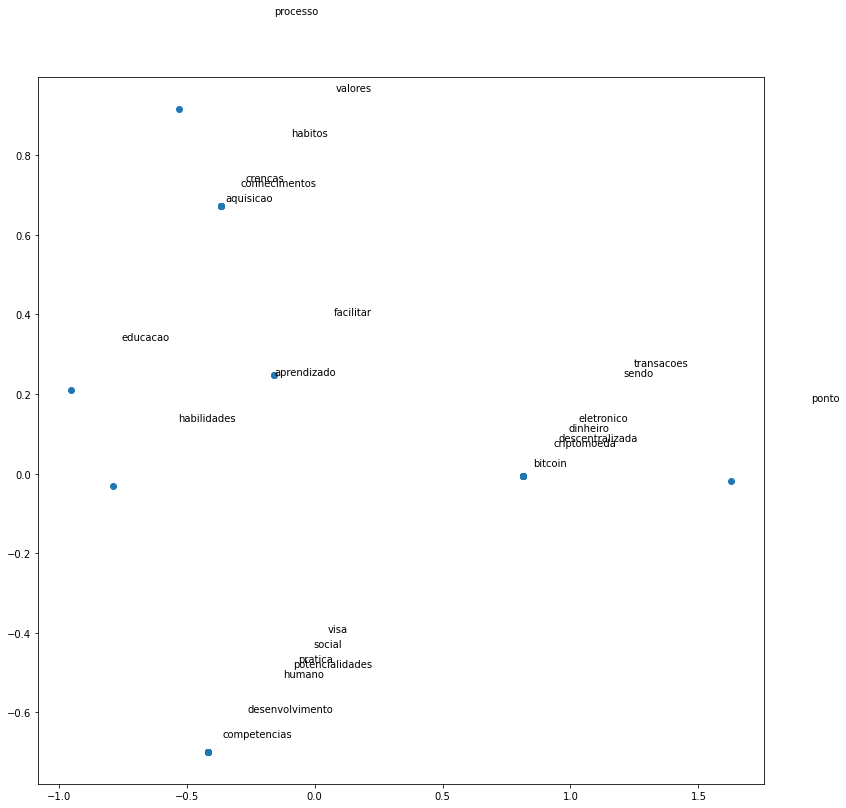

In [39]:
plt.figure(figsize = (13, 13))
plt.scatter(results[:, 0], results[:, 1])
size = len(results[:, 0])
for i in range(size):
  pos = i*5
  plt.annotate(
    count_v.get_feature_names_out()[i],
    (results[i, 0], results[i, 1]),
    textcoords="offset points",
    xytext=(pos,pos), ha='left')
plt.show()